In [184]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Importing the dataset

In [185]:
df=pd.read_csv("Titanic.csv")

In [186]:
print("Titanic passengers\n")
print(df.head())

Titanic passengers

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0          343         0       2    1  28.0      0      0  13.0000         0   
1           76         0       3    1  25.0      0      0   7.6500         0   
2          641         0       3    1  20.0      0      0   7.8542         0   
3          568         0       3    0  29.0      0      4  21.0750         0   
4          672         0       1    1  31.0      1      0  52.0000         0   

  Title  FamilySize  
0   Mrs           0  
1   Mrs           0  
2   Mrs           0  
3   Mrs           4  
4   Mrs           1  


# General Informations

In [187]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    object 
 10  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 76.7+ KB
None


# Preprocessing

In [188]:
print(df.isnull().sum().sum())

0


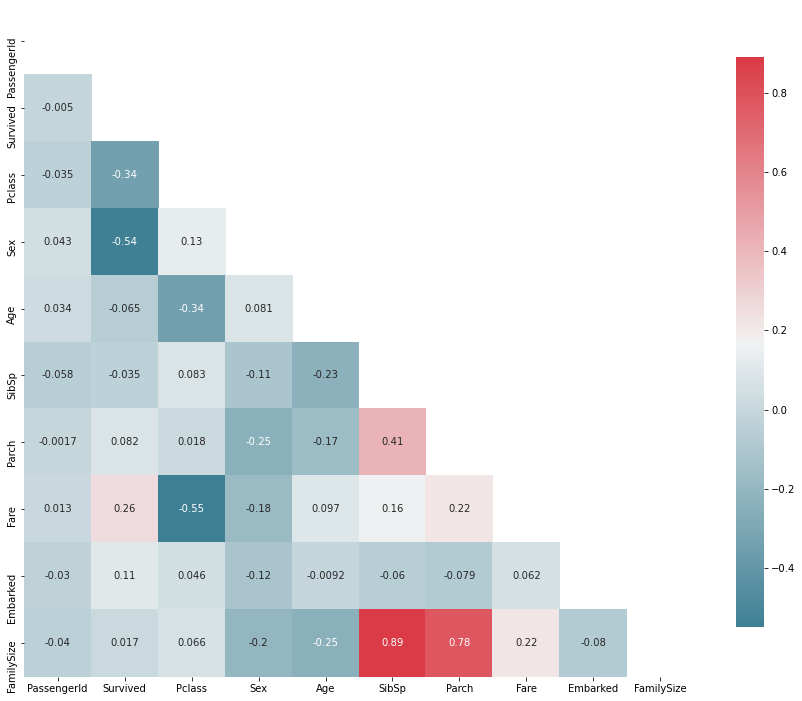

In [189]:
def plot_correlation_map( df ):


    corr=df.corr()
    s , ax = plt.subplots( figsize =( 15 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    
    mask = np.triu(np.ones_like(corr, dtype=bool))

    s = sns.heatmap(

        corr, 

        cmap = cmap,
        
        mask=mask, 

        square=True, 

        cbar_kws={ 'shrink' : .7 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 10 }

        )
plot_correlation_map(df)

# Logistic Regression

In [211]:
x = df[['Fare','Sex']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)  
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

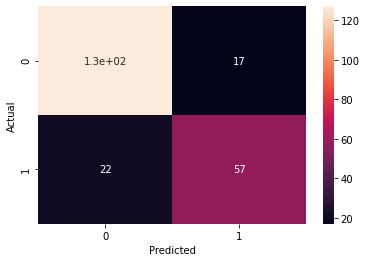

In [191]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       144
           1       0.77      0.72      0.75        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



In [193]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend()
    plt.show()

In [194]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

In [195]:
x = df[['Fare','Sex']]
y = df['Survived']
trainX, testX, trainy, testy = train_test_split(x,y, test_size=0.2, random_state=1)
model = RandomForestClassifier()
model.fit(trainX, trainy)

RandomForestClassifier()

In [196]:
probs = model.predict_proba(testX)

In [197]:
probs = probs[:, 1]

In [198]:
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.84


In [199]:
fpr, tpr, thresholds = roc_curve(testy, probs)

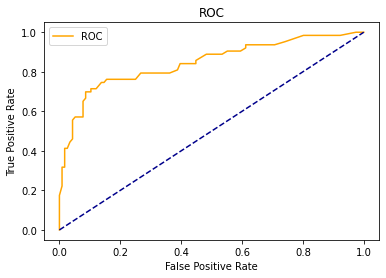

In [212]:
plot_roc_curve(fpr, tpr)

In [201]:
df1=df.drop(['Survived'],axis=1)
df1.drop(['Title'],axis=1,inplace=True)

In [202]:
x = df1
y = df['Survived']

In [203]:
trainX, testX, trainy, testy = train_test_split(x,y, test_size=0.2, random_state=31)

In [204]:
model = RandomForestClassifier()
model.fit(trainX, trainy)

RandomForestClassifier()

In [205]:
probs = model.predict_proba(testX)

In [206]:
probs = probs[:, 1]

In [207]:
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.85


In [208]:
fpr, tpr, thresholds = roc_curve(testy, probs)

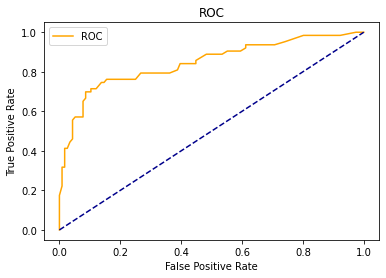

In [209]:
plot_roc_curve(fpr, tpr)